<a href="https://colab.research.google.com/github/Prasanth-Pandiri/APS_fault_detection_E2E_project/blob/main/CNN_Sign_Language_Accredian_Nov2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Approach to solving a CNN Problem

1.  Load the libraries (TensorFlow, Matplotlib, Seaborn)

2. Load the data
3. Visualize the data
4. Set up the CNN Model (Sequential Function)
5. Set up the layers (Convolution Layers, Pooling Layers, Dense Layers)
6. Compile the model (loss function, optimizer)
7. Fit the model (input, output, epochs, batch_size, callbacks etc)
8. Use the model for inference
9. Evaluate the accuracy of the model

# Load Libraries & Dataset

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

Load the data

In [ ]:
train_url = "https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202025/sign_mnist_train.csv"
test_url = "https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202025/sign_mnist_test.csv"

In [ ]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [ ]:
train_df.shape

(27455, 785)

In [ ]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


Divide the data into X & Y and also Train and Test

In [ ]:
X_train = train_df.iloc[:, 1:].values.astype('float32')
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values.astype('float32')
y_test = test_df.iloc[:, 0].values

Reshape the image to 28 * 28 Pixels

In [ ]:
x_train = X_train.reshape(-1,28,28,1)
x_test = X_test.reshape(-1,28,28,1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
x_train /= 255.0
x_test /=255.0

Visualize the Images

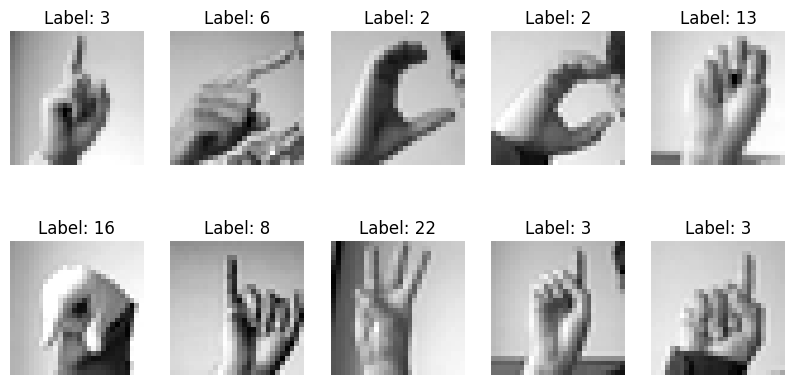

In [ ]:
# Visualize some samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Set up the CNN Model

In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)), # Explicit Input layer
    #Block1 - Feature Extraction
    layers.Conv2D(32, (3, 3), activation='relu'), # input_shape removed here
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    #Block2 - Feature Extraction
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    #Classification Layers
    layers.Dense(128, activation = 'relu'),
    #Output Layers
    layers.Dense(25, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

Compile The Model

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Visualize the filters

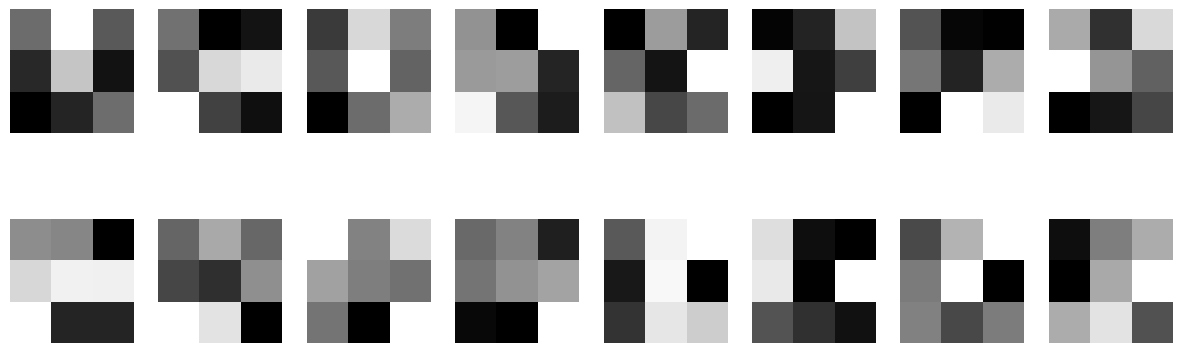

In [ ]:
# Visualize the filters of the first convolutional layer
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 16
plt.figure(figsize=(15, 5))
for i in range(n_filters):
    plt.subplot(2, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()

Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split=0.2)

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.3391 - loss: 2.2668 - val_accuracy: 0.8858 - val_loss: 0.4087
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9026 - loss: 0.3231 - val_accuracy: 0.9734 - val_loss: 0.1193
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9862 - loss: 0.0775 - val_accuracy: 0.9971 - val_loss: 0.0276
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.9986 - loss: 0.0212 - val_accuracy: 0.9991 - val_loss: 0.0125
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9984 - loss: 0.0129 - val_accuracy: 0.9998 - val_loss: 0.0061
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.9999 - loss: 0.0043 - val_accuracy: 0.9995 - val_loss: 0.0038
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9970 - loss: 0.0125 - val_accuracy: 0.9998 - val_loss: 0.0020
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 1.0000 - loss: 0.0015 - 

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9072 - loss: 0.4465
Test Accuracy: 0.91


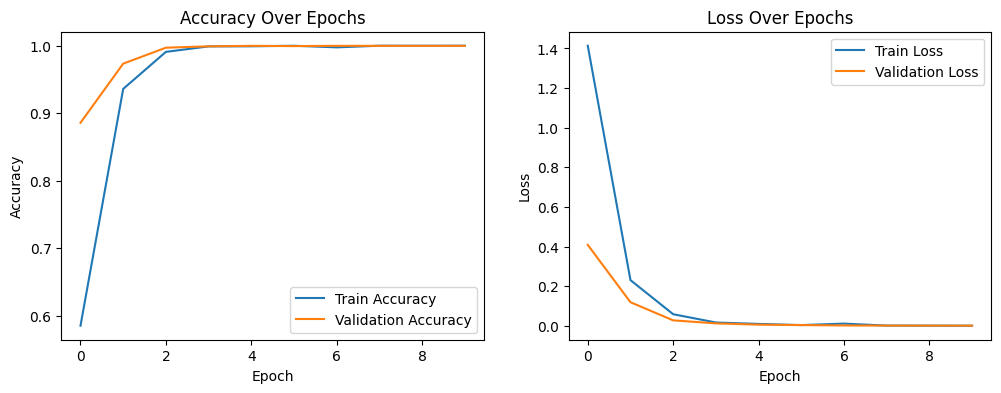

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Inference The model

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


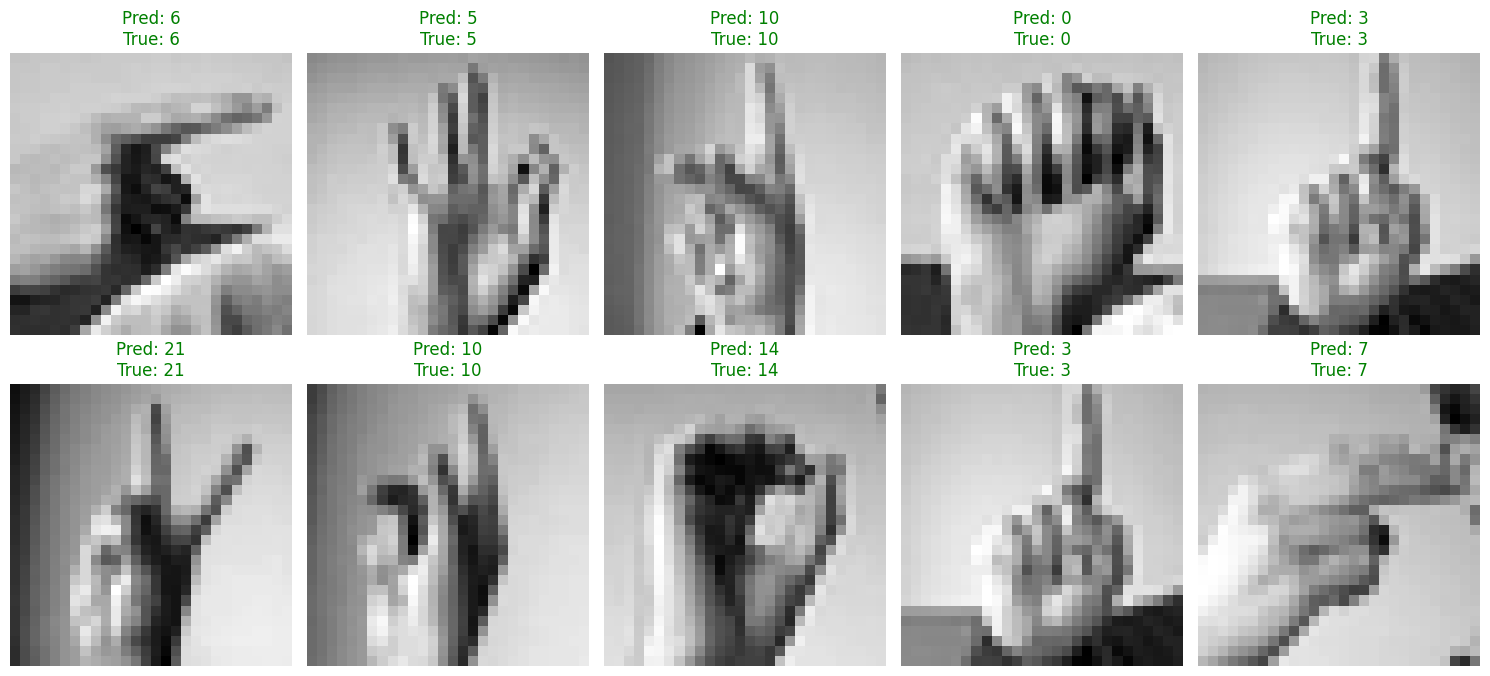

In [ ]:
# Make predictions on test data
predictions = model.predict(x_test)

# Display some predictions
plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')

    # Get the predicted and true labels
    predicted_label = np.argmax(predictions[i])  # Class with the highest probability
    true_label = y_test[i]

    # Set the title with both predicted and true labels
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color='green' if predicted_label == true_label else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
predicted_label

np.int64(7)